In [21]:
import pandas as pd

## Loading Data

In [22]:
# Load the data and display the first 5 rows
df = pd.read_csv('Logan_housing.csv')
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [23]:
# check if there are any missing values
df.isnull().sum()

Sold Price           0
DOM                  0
Garage Capacity      0
HOA Fee              0
Irregular Shape      0
Quadrant             0
School District      0
Sold Terms           0
Total Bedrooms       0
Total Bathrooms      0
Total Square Feet    0
Year Built           0
Zip                  0
year_sold            0
month_sold           0
built_after_2000     0
dtype: int64

There are no missing values.

### Checking Data Types

In [24]:
# making sure all variables are in the correct format
df.dtypes

Sold Price            int64
DOM                   int64
Garage Capacity       int64
HOA Fee               int64
Irregular Shape      object
Quadrant             object
School District      object
Sold Terms           object
Total Bedrooms        int64
Total Bathrooms       int64
Total Square Feet     int64
Year Built            int64
Zip                   int64
year_sold             int64
month_sold            int64
built_after_2000      int64
dtype: object

In [25]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

Based on the above outputs we need to change:
1. Irregular Shape
2. Quadrant
3. School District
4. Sold Terms
5. Zip
6. month_sold
7. built_after_2000
 to categorical data

I am switching year and month to categorical because we are not using them in terms of time series analysis and it makes it more memory efficient.

In [26]:
# changing the type of data for selected columns to categorical
categorical_columns = ['Irregular Shape', 'Quadrant', 'School District','Sold Terms','month_sold','built_after_2000']
df[categorical_columns] = df[categorical_columns].astype('category')

# changing the types of data for selected columns to float
float_columns = ['Sold Price','HOA Fee','Total Bedrooms','Total Bathrooms','Total Square Feet']
df[float_columns] = df[float_columns].astype('float')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   float64 
 1   DOM                4110 non-null   int64   
 2   Garage Capacity    4110 non-null   int64   
 3   HOA Fee            4110 non-null   float64 
 4   Irregular Shape    4110 non-null   category
 5   Quadrant           4110 non-null   category
 6   School District    4110 non-null   category
 7   Sold Terms         4110 non-null   category
 8   Total Bedrooms     4110 non-null   float64 
 9   Total Bathrooms    4110 non-null   float64 
 10  Total Square Feet  4110 non-null   float64 
 11  Year Built         4110 non-null   int64   
 12  Zip                4110 non-null   int64   
 13  year_sold          4110 non-null   int64   
 14  month_sold         4110 non-null   category
 15  built_after_2000   4110 non-null   category
dtypes: cat

### Splitting Data

In [28]:
# splitting data into 2 parts for modeling and predicting
data = df.sample(frac=0.95, random_state=500)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

## Pycaret Regression

In [29]:
from pycaret.regression import *

In [30]:
exp = RegressionExperiment()
exp.setup(data, target = 'DOM', categorical_features = categorical_columns,
          numeric_features = float_columns, experiment_name = 'my_experiment')

,Description,Value
0,Session id,7521
1,Target,DOM
2,Target type,Regression
3,Original data shape,"(3904, 16)"
4,Transformed data shape,"(3904, 35)"
5,Transformed train set shape,"(2732, 35)"
6,Transformed test set shape,"(1172, 35)"
7,Numeric features,5
8,Categorical features,6
9,Preprocess,True


### Comparing Models

In [31]:
# list of models to use
model_list = ['lr', 'en', 'xgboost', 'catboost', 'lightgbm']
my_models = exp.compare_models(include = model_list, sort = 'rmse', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,33.5706,2460.8143,49.3519,0.0826,1.3317,3.9438,0.3950
en,Elastic Net,33.9084,2481.8259,49.5551,0.0752,1.3487,4.0658,0.1950
lightgbm,Light Gradient Boosting Machine,32.5061,2511.4349,49.7742,0.0698,1.2799,3.4562,0.0370
catboost,CatBoost Regressor,32.1934,2523.7077,49.9410,0.0517,1.2642,3.3887,0.5390
xgboost,Extreme Gradient Boosting,34.2420,2911.1910,53.6287,-0.1152,1.3104,3.5325,0.0680


In [32]:
my_models

[LinearRegression(n_jobs=-1),
 ElasticNet(random_state=7521),
 LGBMRegressor(random_state=7521),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=7521, ...)]

### Tuning Models

In [33]:
tuned_models = [exp.tune_model(model, optimize='rmse') for model in my_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35.2942,2898.3140,53.8360,0.1074,1.3034,3.6624
1,33.8698,2514.5484,50.1453,0.1036,1.3330,4.2606
2,30.8877,1903.0572,43.6240,0.1668,1.3259,3.9677
3,34.4610,2531.2345,50.3114,0.0983,1.3175,3.6902
4,34.9620,3496.1522,59.1283,0.1094,1.3660,4.2976
5,31.0285,1839.5053,42.8895,-0.0269,1.3524,4.0704
6,35.3691,2571.6178,50.7111,0.1396,1.3838,4.4066
7,32.0610,1804.9822,42.4851,0.0084,1.3453,3.8861
8,34.3818,2746.9177,52.4110,-0.0104,1.2904,3.5269


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35.5335,2954.1847,54.3524,0.0902,1.3256,3.8386
1,34.2973,2596.8766,50.9596,0.0743,1.3581,4.4253
2,30.9090,1915.5828,43.7674,0.1613,1.3425,4.1101
3,33.9925,2504.5701,50.0457,0.1078,1.2981,3.6950
4,35.4705,3502.3284,59.1805,0.1078,1.3798,4.3797
5,31.2497,1829.0369,42.7672,-0.0211,1.3596,4.1423
6,34.6253,2467.8290,49.6772,0.1743,1.3672,4.2641
7,32.2965,1794.3292,42.3595,0.0143,1.3433,3.9685
8,34.6689,2747.9546,52.4209,-0.0108,1.3132,3.7536


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.1385,2868.3823,53.5573,0.1167,1.2590,3.3426
1,32.5182,2350.7433,48.4845,0.1620,1.2668,3.6823
2,28.8270,1849.4859,43.0056,0.1903,1.2712,3.4154
3,34.1070,2621.1754,51.1974,0.0663,1.2517,3.3327
4,33.9399,3455.1613,58.7806,0.1199,1.3116,3.9466
5,28.5722,1594.9923,39.9374,0.1096,1.2492,3.2993
6,34.1077,2450.6834,49.5044,0.1800,1.3320,3.8768
7,30.6565,1709.1811,41.3422,0.0611,1.2424,3.2498
8,33.0909,2554.1337,50.5384,0.0605,1.2227,3.0619


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.3942,2796.0246,52.8774,0.1389,1.2657,3.4983
1,33.0042,2367.4691,48.6566,0.1560,1.2875,3.8402
2,27.9786,1616.7160,40.2084,0.2922,1.2533,3.4708
3,33.8778,2488.0713,49.8806,0.1137,1.2602,3.4256
4,33.3626,3284.8194,57.3133,0.1632,1.3088,3.8604
5,28.7322,1573.9712,39.6733,0.1213,1.2637,3.4714
6,33.4690,2560.2708,50.5991,0.1434,1.3251,3.8463
7,31.5236,1950.6571,44.1662,-0.0716,1.2662,3.5141
8,33.4723,2693.9241,51.9030,0.0091,1.2316,3.1996


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.1787,2919.8923,54.0360,0.1008,1.2471,3.0323
1,33.2199,2677.5552,51.7451,0.0455,1.2518,3.7872
2,26.8649,1823.7047,42.7049,0.2016,1.1812,2.9482
3,34.5827,2703.6746,51.9969,0.0369,1.2586,3.1451
4,33.1494,3215.1270,56.7021,0.1810,1.2983,3.5558
5,27.4906,1581.0291,39.7622,0.1174,1.2580,3.0093
6,33.4651,2711.7815,52.0748,0.0927,1.3217,3.7740
7,30.6596,1926.7903,43.8952,-0.0585,1.2322,3.0460
8,35.2029,2824.4326,53.1454,-0.0390,1.2472,2.9821


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [14]:
tuned_models

[LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, feature_fraction=0.5,
               learning_rate=0.01, min_child_samples=1, min_split_gain=0.7,
               n_estimators=190, num_leaves=40, random_state=3748, reg_alpha=5,
               reg_lambda=2),
 LinearRegression(n_jobs=-1),
 ElasticNet(alpha=0.12, fit_intercept=False, l1_ratio=0.035, random_state=3748),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
   

The winning model between tuned and un-tuned is:

Tuned catboost

although i re ran it and got tuned XGboost as the winner

### Creating model from the best one

In [34]:
catboost_model = exp.create_model('catboost')
catboost_tuned = exp.tune_model(catboost_model, optimize='rmse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.4943,2795.7973,52.8753,0.1390,1.2449,3.0577
1,32.5599,2376.5511,48.7499,0.1528,1.2511,3.7791
2,27.1768,1725.2286,41.5359,0.2447,1.2255,3.1827
3,34.1254,2747.3822,52.4155,0.0213,1.2386,3.1714
4,33.6494,3746.0979,61.2054,0.0457,1.3271,3.7030
5,28.9469,1675.9394,40.9382,0.0644,1.2483,3.2803
6,33.6225,2559.5684,50.5922,0.1436,1.3315,3.8381
7,30.4177,2584.4731,50.8377,-0.4198,1.2398,3.1655
8,33.9012,2519.9786,50.1994,0.0730,1.2248,3.0727


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.3942,2796.0246,52.8774,0.1389,1.2657,3.4983
1,33.0042,2367.4691,48.6566,0.1560,1.2875,3.8402
2,27.9786,1616.7160,40.2084,0.2922,1.2533,3.4708
3,33.8778,2488.0713,49.8806,0.1137,1.2602,3.4256
4,33.3626,3284.8194,57.3133,0.1632,1.3088,3.8604
5,28.7322,1573.9712,39.6733,0.1213,1.2637,3.4714
6,33.4690,2560.2708,50.5991,0.1434,1.3251,3.8463
7,31.5236,1950.6571,44.1662,-0.0716,1.2662,3.5141
8,33.4723,2693.9241,51.9030,0.0091,1.2316,3.1996


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,200
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


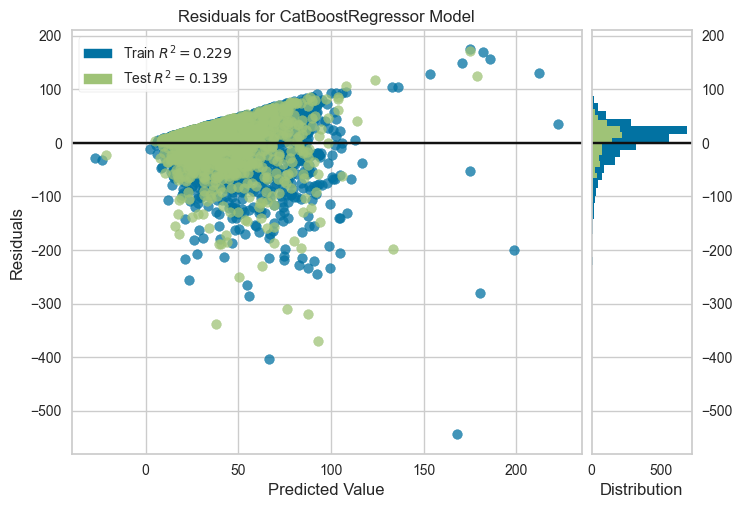

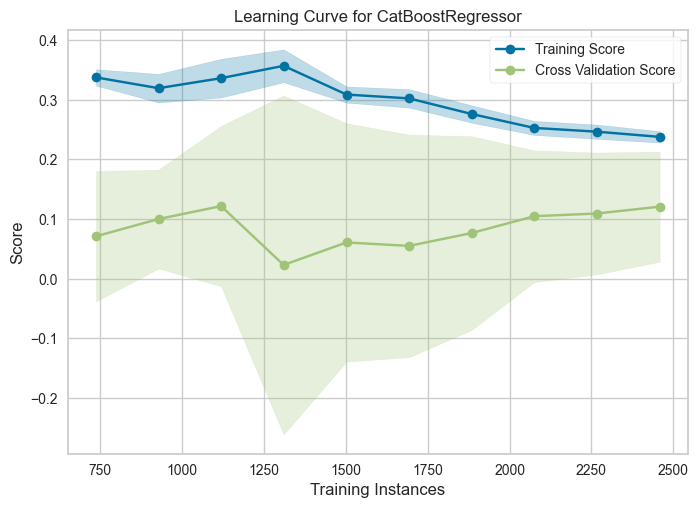

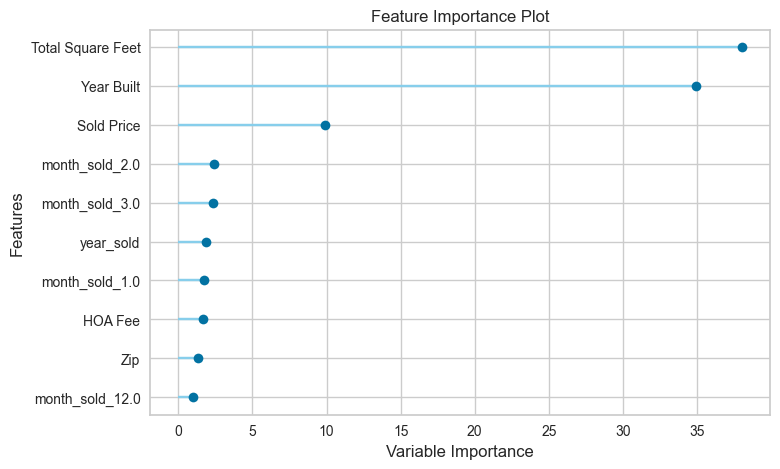

In [35]:
# plotting parameters table
exp.plot_model(catboost_tuned, plot = 'parameter')
# plotting residuals
exp.plot_model(catboost_tuned, plot = 'residuals')
# plotting learning curve
exp.plot_model(catboost_tuned, plot = 'learning')
# plotting feature importance
exp.plot_model(catboost_tuned, plot = 'feature')

### Prediction on Holdout Set

In [36]:
holdout_predictions = exp.predict_model(catboost_tuned)
holdout_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,32.2739,2256.8103,47.5059,0.1387,1.3143,3.8739


,Sold Price,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000,DOM,prediction_label
8,299900.0,2,0.0,No,NE,Cache,Conventional,3.0,2.0,2730.0,2019,84333,2019,6,1,56,77.083684
1435,275500.0,2,10.0,No,SW,Logan,Conventional,3.0,2.0,1810.0,2006,84321,2020,7,1,13,18.844117
490,272500.0,2,70.0,No,NW,Logan,Conventional,3.0,2.0,1768.0,2007,84321,2018,7,1,47,24.249416
601,289900.0,2,100.0,No,NW,Logan,Conventional,3.0,2.0,1784.0,2007,84321,2020,8,1,151,17.259952
3432,239900.0,2,110.0,No,SE,Cache,USDA Rural Development,3.0,3.0,1575.0,2020,84319,2020,6,1,11,38.381559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,256500.0,2,125.0,No,SE,Cache,Conventional,5.0,2.0,2462.0,2011,84335,2019,7,1,3,29.336769
3768,220000.0,2,0.0,No,SW,Logan,Cash,3.0,2.0,1651.0,2000,84321,2018,7,1,36,21.711617
271,330000.0,2,0.0,No,SE,Cache,Conventional,6.0,3.0,2990.0,2020,84335,2020,3,1,17,76.619011
401,455183.0,3,0.0,No,SE,Cache,Conventional,3.0,2.0,4017.0,2019,84332,2020,3,1,98,98.219228


### Finalizing Model

In [37]:
my_winning_model = exp.finalize_model(catboost_tuned)

In [38]:
unseen_predictions = exp.predict_model(my_winning_model, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,30.3382,1874.2397,43.2925,0.1314,1.2042,3.2568


,Sold Price,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000,DOM,prediction_label
0,274000.0,2,0.0,No,NW,Cache,Cash,7.0,3.0,2688.0,1996,84305,2018,7,0,4,34.362506
1,397000.0,3,100.0,No,NE,Cache,Conventional,5.0,4.0,3312.0,2014,84318,2020,10,1,1,48.246418
2,299900.0,2,0.0,No,NW,Cache,Conventional,4.0,2.0,2301.0,2000,84318,2020,2,1,3,38.484830
3,360000.0,2,0.0,No,NW,Cache,Conventional,5.0,3.0,2536.0,2002,84318,2020,10,1,4,27.085720
4,295000.0,2,0.0,Yes,SE,Cache,Conventional,5.0,2.0,2485.0,1986,84318,2019,6,0,7,23.805478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,375000.0,4,0.0,Yes,NE,Cache,Conventional,4.0,3.0,3364.0,2006,84339,2019,7,1,29,46.884623
202,700000.0,3,0.0,No,SW,Cache,Conventional,5.0,4.0,4034.0,2001,84339,2020,9,1,38,44.448383
203,207500.0,2,0.0,No,NW,Cache,FHA,3.0,1.0,1234.0,1903,84339,2019,9,0,99,29.092072
204,690000.0,4,600.0,No,SW,Cache,Conventional,5.0,4.0,3670.0,2013,84339,2020,9,1,323,55.740672


### Saving model for future use

In [39]:
exp.save_model(my_winning_model, 'HW3_pycaret_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Sold Price', 'HOA Fee',
                                              'Total Bedrooms',
                                              'Total Bathrooms',
                                              'Total Square Feet'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Irregular Shape', 'Quadrant',
                                              'School District', 'Sold Terms',
                                              'month_sold', 'built_after_2000'],
                                     transformer=...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Quadrant', 'Sold Terms',
                                              'month_sold'],
                                     transformer=OneHotEncoder(cols=['Quadrant',
   